**Loading the required packages**

In [35]:
#Loading the required packages
import numpy as np   
from sklearn.linear_model import LinearRegression
from scipy import stats 
from scipy.stats import zscore
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd    
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [36]:
#Loading the CSV File
car=pd.read_csv('/Users/purushottamsahu/Desktop/Automobiles/Car.csv')
car.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [37]:
row, column = car.shape
print('The dataset contains', row, 'rows and', column, 'columns')

The dataset contains 398 rows and 9 columns


In [38]:
# save this data as to csv,xlsx and json
import os

# Define the directory path
output_directory = '/Users/purushottamsahu/Desktop/Automobiles'

# Define the file names
csv_filename = 'mpg.csv'
xlsx_filename = 'mpg.xlsx'
json_filename = 'mpg.json'

# Concatenate the full file paths
csv_file_path = os.path.join(output_directory, csv_filename)
xlsx_file_path = os.path.join(output_directory, xlsx_filename)
json_file_path = os.path.join(output_directory, json_filename)

# Save the data to the specified file paths
car.to_csv(csv_file_path, index=False)
car.to_excel(xlsx_file_path, index=False)
car.to_json(json_file_path, orient='split', compression='infer', index='true')


In [39]:
#dropping/ignoring car_name 
car = car.drop('car name', axis=1)
# Also replacing the categorical var with actual values
car['origin'] = car['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
car.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


In [40]:
print('The data type of each attribute: \n')
car.info()

The data type of each attribute: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [41]:
#5-point summary
car.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [42]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(car.horsepower.str.isdigit()) 

#print isDigit = False!
car[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,america
126,21.0,6,200.0,?,2875,17.0,74,america
330,40.9,4,85.0,?,1835,17.3,80,europe
336,23.6,4,140.0,?,2905,14.3,80,america
354,34.5,4,100.0,?,2320,15.8,81,europe
374,23.0,4,151.0,?,3035,20.5,82,america


In [43]:
# Replace missing values with NaN
car = car.replace('?', np.nan)
car[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,america
126,21.0,6,200.0,NaN,2875,17.0,74,america
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,america
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,america


In [ ]:
#replace the missing values with median value. 
car.median()

In [44]:
#replace hp with median
car['horsepower'].fillna((car['horsepower'].median()), inplace=True)
car.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


In [45]:
 print('The data set has no missing values \n')
car.isnull().sum()

The data set has no missing values 



mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [46]:
#creating mpg_level attribute using the 25% and 75% of mpg values( <  17 as low, > 17 and <29 as medium, > 29 as high  )
car['mpg_level'] = car['mpg'].apply(lambda x: 'low' if x<17 else 'high' if x>29 else 'medium')
car.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg_level
0,18.0,8,307.0,130,3504,12.0,70,america,medium
1,15.0,8,350.0,165,3693,11.5,70,america,low
2,18.0,8,318.0,150,3436,11.0,70,america,medium
3,16.0,8,304.0,150,3433,12.0,70,america,low
4,17.0,8,302.0,140,3449,10.5,70,america,medium


In [47]:
#categorical variable
car_cat = car.iloc[:,[1,6,7,8]]
car_cat.head()

,cylinders,model year,origin,mpg_level
0,8,70,america,medium
1,8,70,america,low
2,8,70,america,medium
3,8,70,america,low
4,8,70,america,medium


In [49]:
#numeric variables
car_num=car.drop(['cylinders','model year','origin','mpg_level'],axis=1)
car_num.head()

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130,3504,12.0
1,15.0,350.0,165,3693,11.5
2,18.0,318.0,150,3436,11.0
3,16.0,304.0,150,3433,12.0
4,17.0,302.0,140,3449,10.5


<Figure size 1400x800 with 0 Axes>

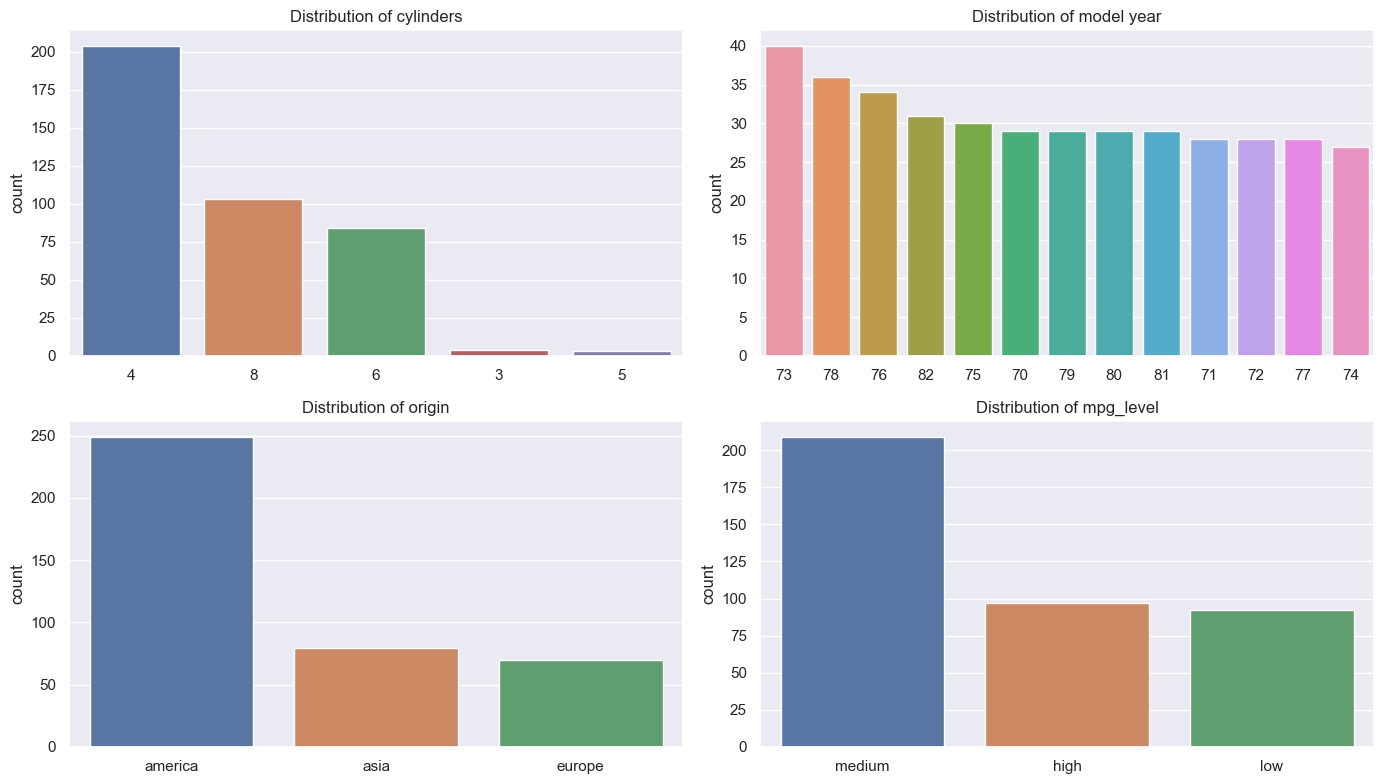

In [53]:
#plotting categorical variables

fig = plt.figure(figsize=(14, 8))

for i, col in enumerate(car_cat.columns):
    ax = plt.subplot(2, 2, i + 1)
    data_for_plot = car_cat[col].to_frame()
    sns.countplot(data=data_for_plot, x=col, order=data_for_plot[col].value_counts().index)
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

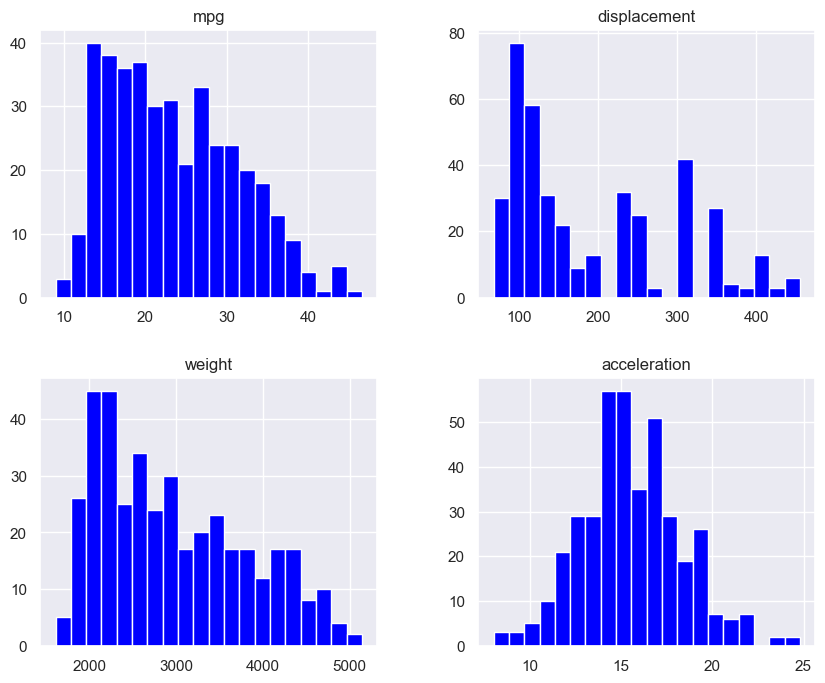

In [54]:
#plot histograms
car_num.hist(bins = 20, figsize = (10, 8), color = 'blue')
plt.show()

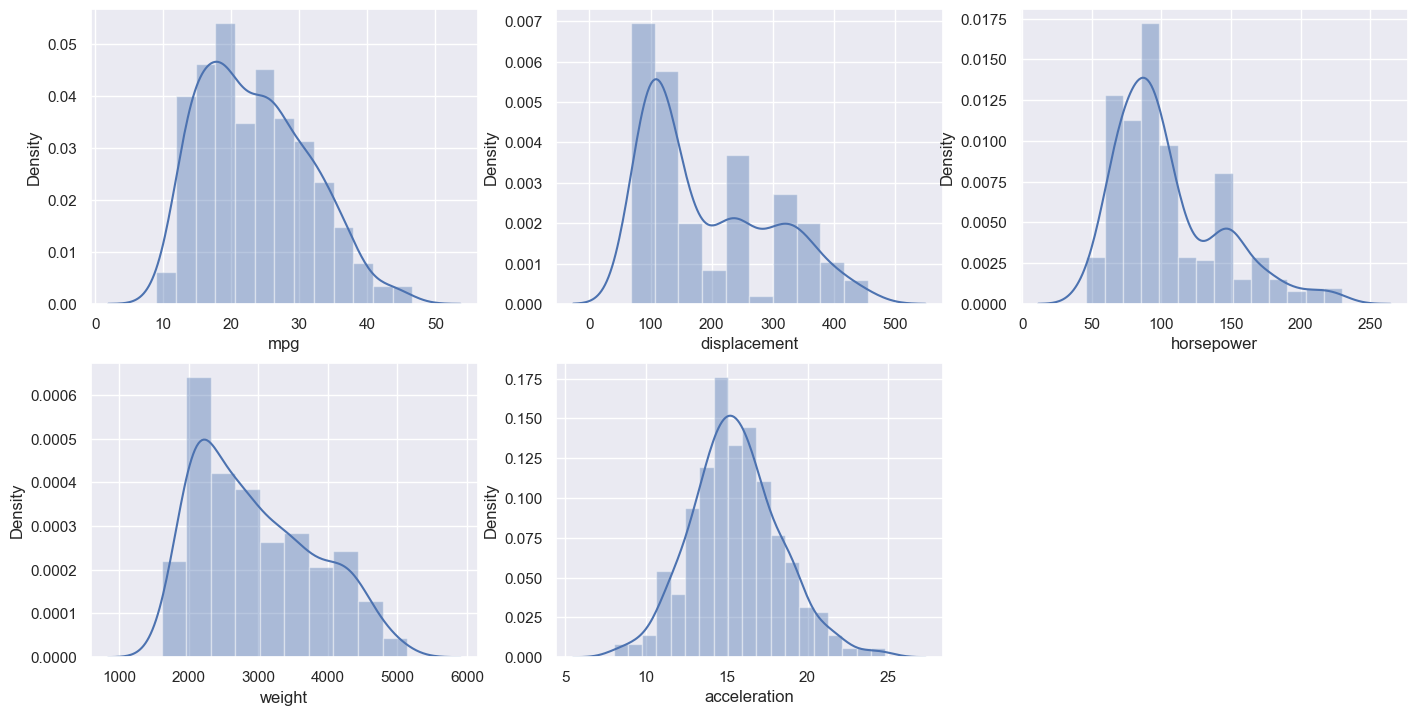

In [55]:
#plot density
plt.figure(figsize=(17, 13))
col = 1
for i in car_num.columns:
    plt.subplot(3, 3, col)
    sns.distplot(car_num[i], color = 'b')
    col += 1 

In [62]:
#joining the categorical and numerical variables
car=pd.concat([car_cat,car_num],axis=1)

In [57]:
#checking for attribute type
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   model year    398 non-null    int64  
 2   origin        398 non-null    object 
 3   mpg_level     398 non-null    object 
 4   mpg           398 non-null    float64
 5   displacement  398 non-null    float64
 6   horsepower    398 non-null    object 
 7   weight        398 non-null    int64  
 8   acceleration  398 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 28.1+ KB


In [63]:
#create dummy varibale for mpg_level and origin and creating a seperate datset for k-means and heirarchical clustering
car = pd.get_dummies(car, columns=['origin'])
car = pd.get_dummies(car, columns=['mpg_level'])
carH=car.copy()
carK=car.copy()
car.head()

,cylinders,model year,mpg,displacement,horsepower,weight,acceleration,origin_america,origin_asia,origin_europe,mpg_level_high,mpg_level_low,mpg_level_medium
0,8,70,18.0,307.0,130,3504,12.0,True,False,False,False,False,True
1,8,70,15.0,350.0,165,3693,11.5,True,False,False,False,True,False
2,8,70,18.0,318.0,150,3436,11.0,True,False,False,False,False,True
3,8,70,16.0,304.0,150,3433,12.0,True,False,False,False,True,False
4,8,70,17.0,302.0,140,3449,10.5,True,False,False,False,False,True


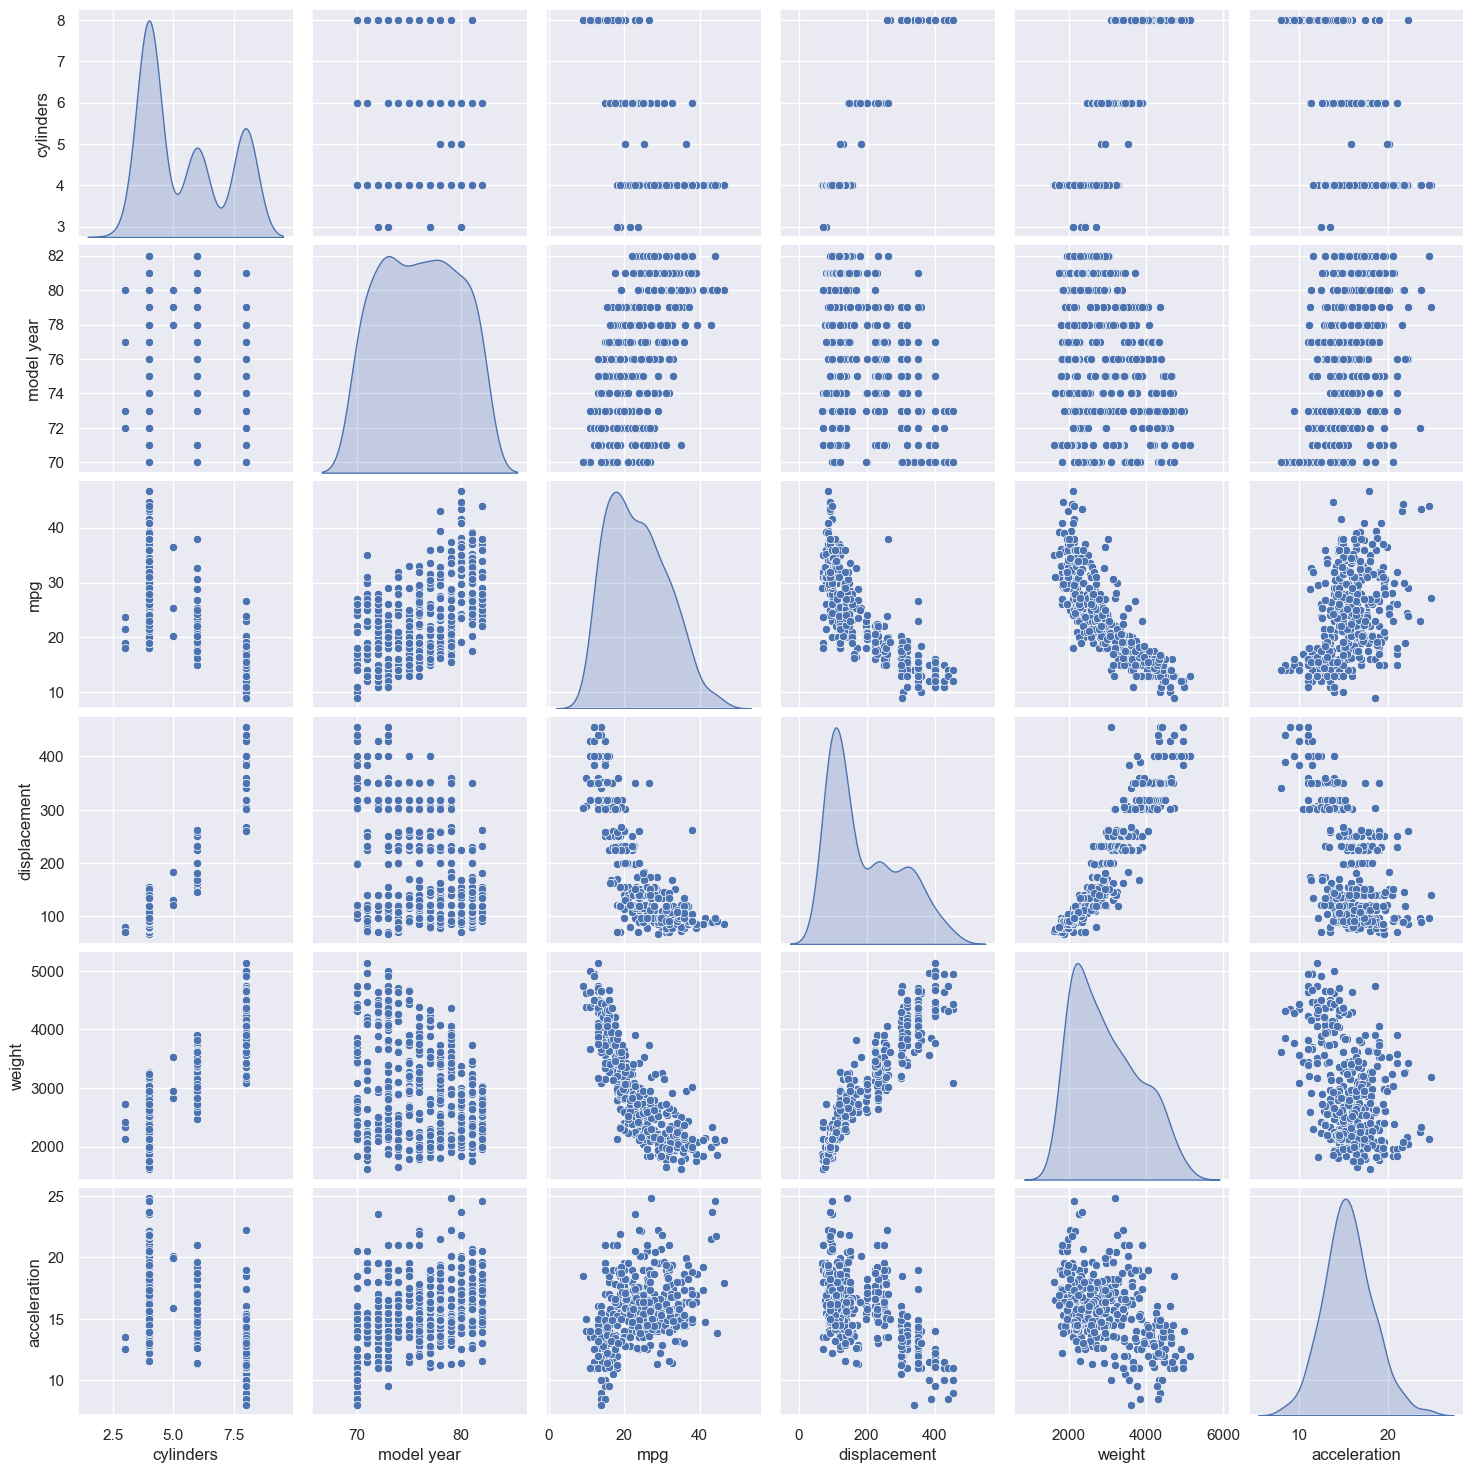

In [59]:
#pair plot for the numeric attributes
car_attr = car.iloc[:, 0:7]
sns.pairplot(car_attr, diag_kind='kde');

In [64]:
#dropping the created dummy variable
car2=car.drop(['origin_america','origin_asia','origin_europe','mpg_level_high','mpg_level_low','mpg_level_medium'],axis=1)

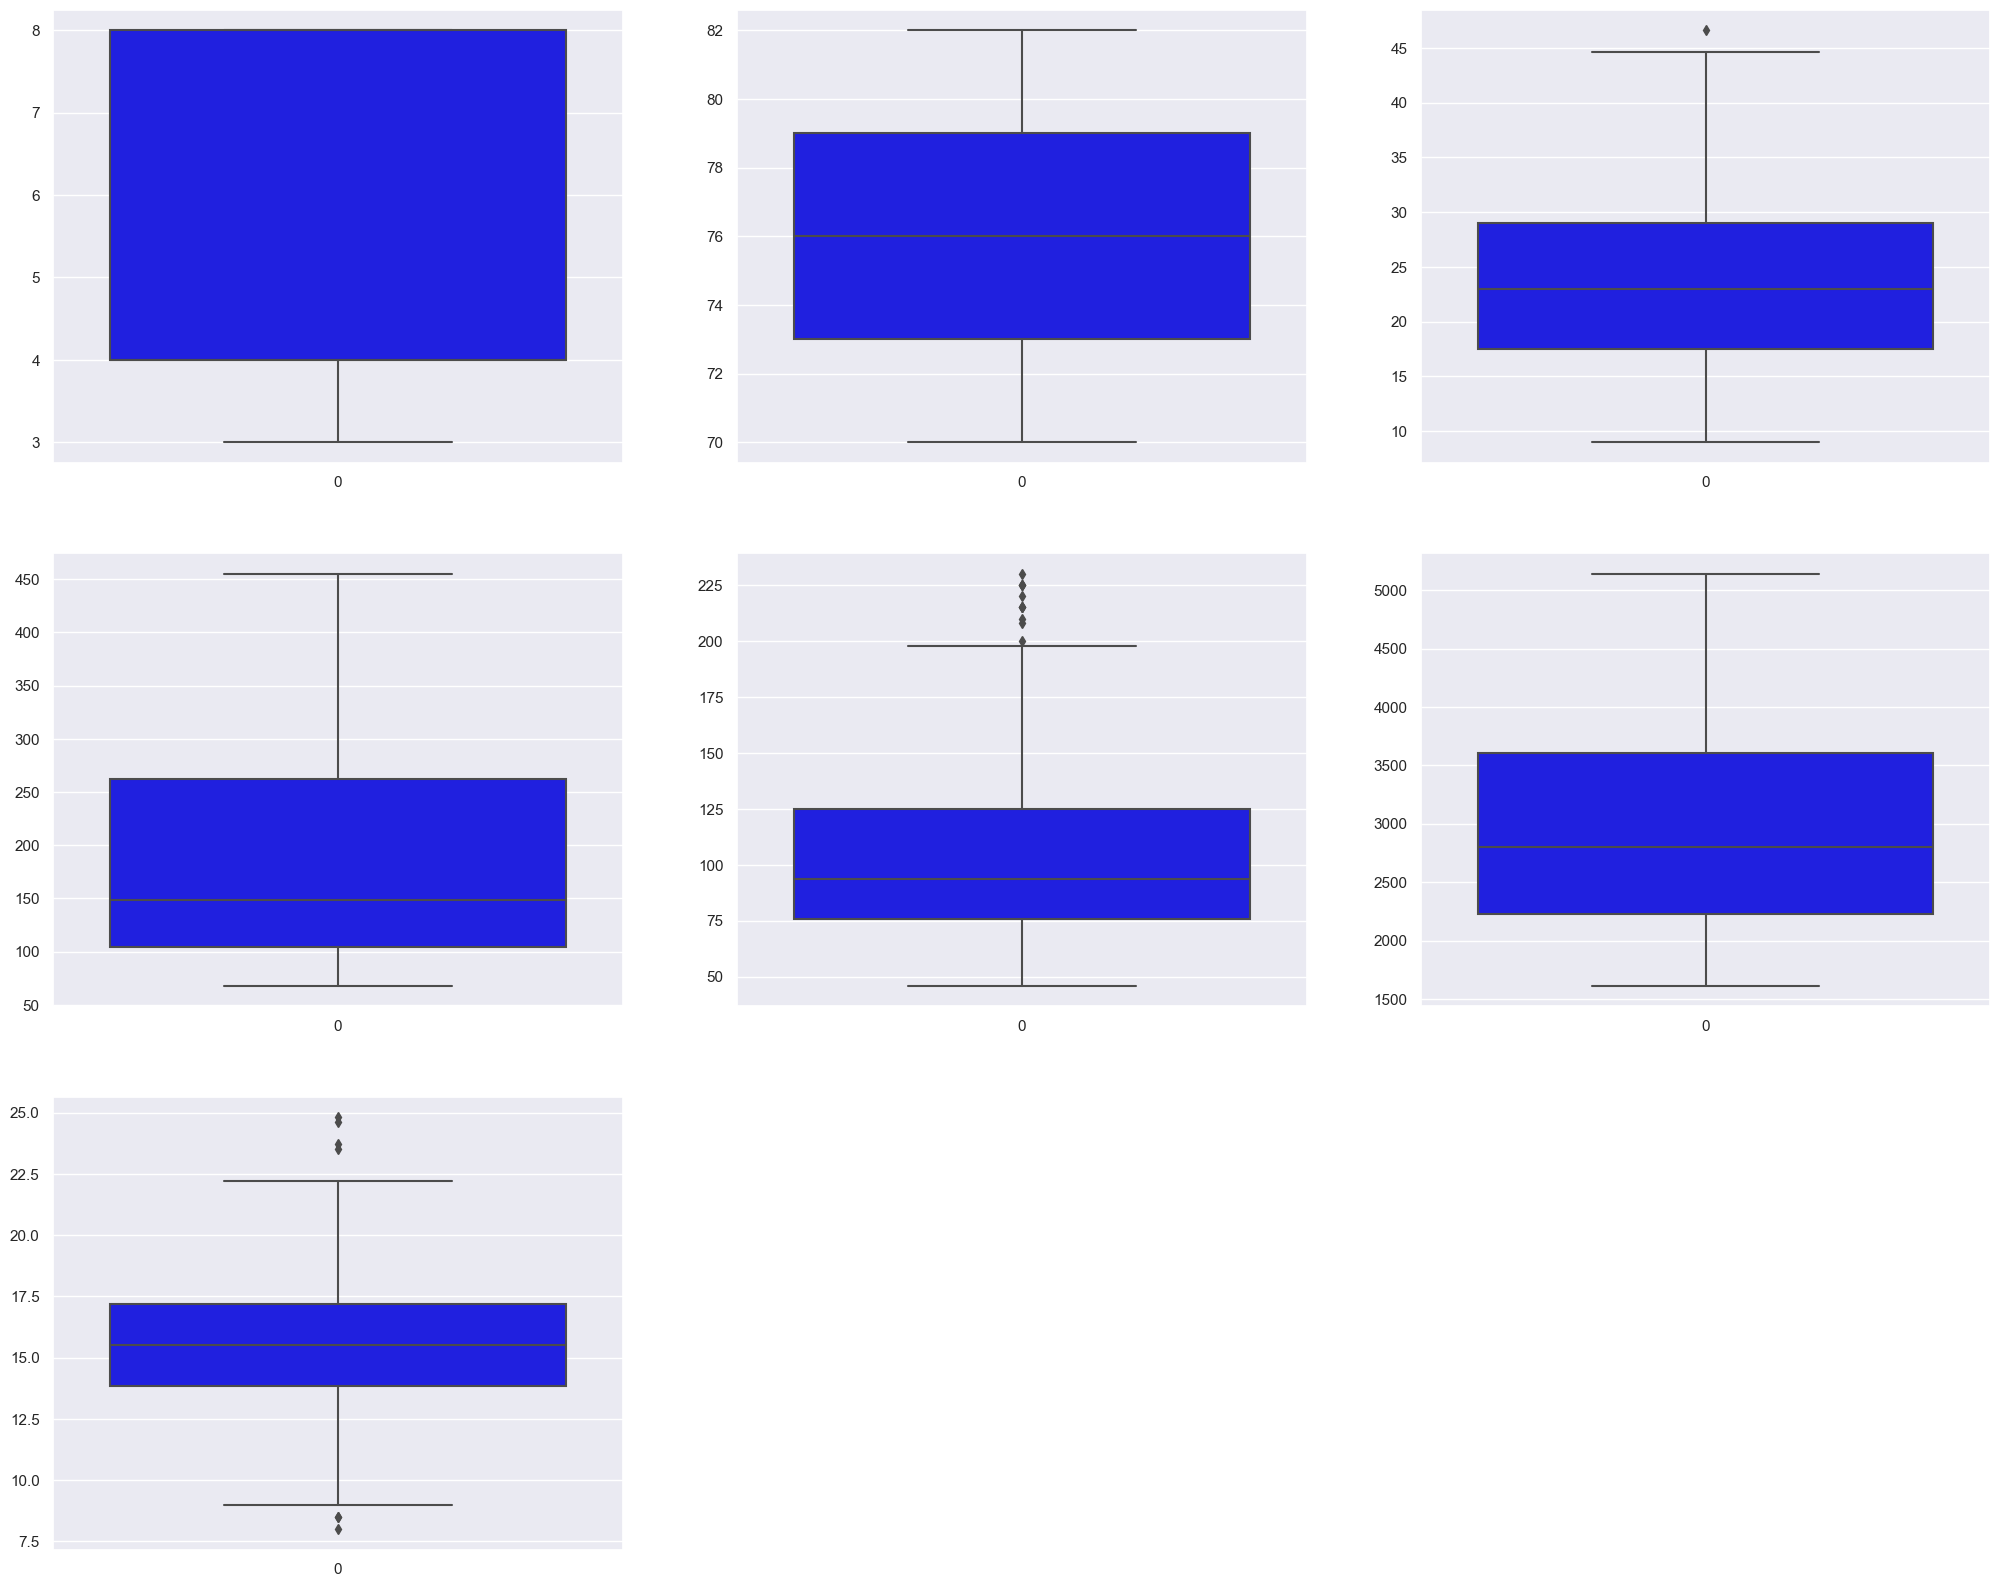

In [65]:
#checking of outliers
plt.figure(figsize=(25, 20))
col = 1
for i in car2.columns:
    plt.subplot(3, 3, col)
 a   sns.boxplot(car2[i],color='blue')
    col += 1

In [71]:
car2['horsepower'] = pd.to_numeric(car2['horsepower'], errors='coerce')
#replacing outliers with IQR (Q1 and Q3 +-1.5*IQR)
IQR1 = stats.iqr(car2['horsepower'], interpolation = 'midpoint')
IQR2 = stats.iqr(car2['acceleration'], interpolation = 'midpoint')

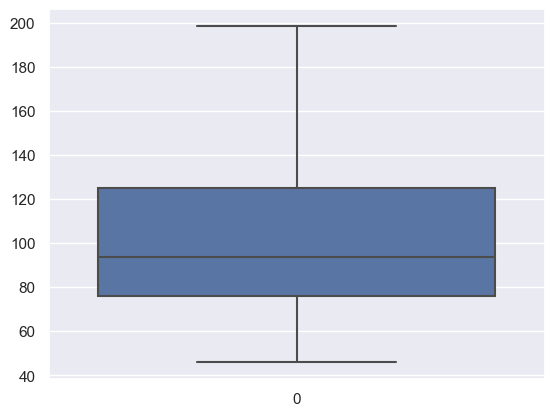

In [73]:
#Horsepower after imputing outliers
Q3 = car2['horsepower'].quantile(0.75)
car2['horsepower'] = np.where(car2["horsepower"] >(Q3+1.5*IQR1), 198.5,car2['horsepower'])
sns.boxplot(car2['horsepower']);

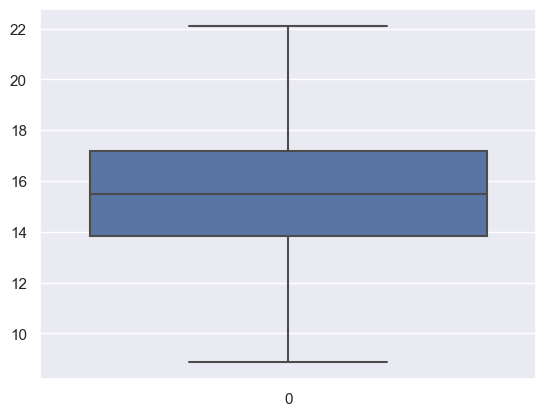

In [75]:
#accelaration after imputing outliers
Q1 = car2['acceleration'].quantile(0.25)
Q31=car2['acceleration'].quantile(0.75)
car2['acceleration'] = np.where(car2["acceleration"] >(Q31+1.5*IQR2),22.10 ,car2['acceleration'])
car2['acceleration'] = np.where(car2["acceleration"] <(Q1-1.5*IQR2),(Q1-1.5*IQR2),car2['acceleration'])
sns.boxplot(car2['acceleration']);

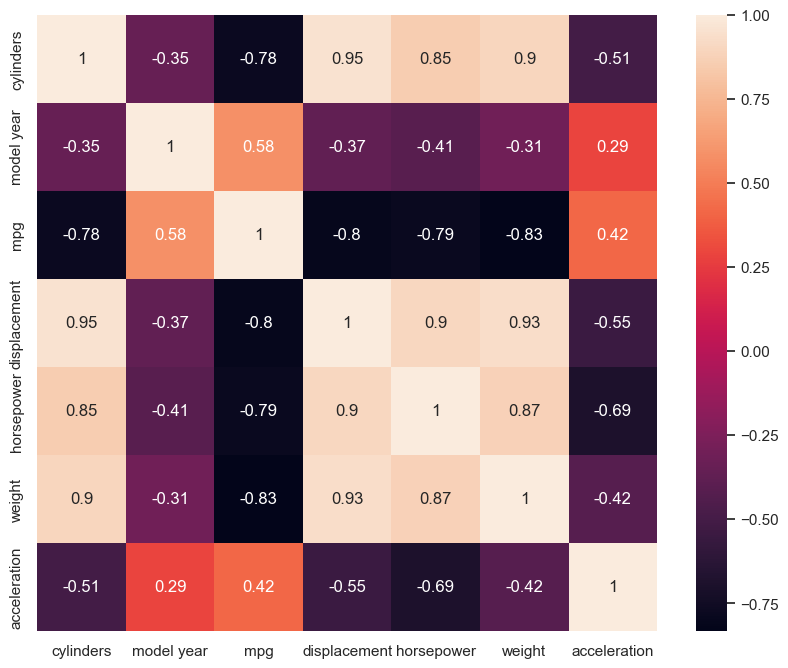

In [76]:
#checking for correlation
plt.figure(figsize=(10,8))
corr=car2.corr()
sns.heatmap(corr,annot=True);

**Heirarchical Clustering**

In [77]:
#separating numeric variables
cc = car.iloc[:,0:7] 
cc.head()

,cylinders,model year,mpg,displacement,horsepower,weight,acceleration
0,8,70,18.0,307.0,130,3504,12.0
1,8,70,15.0,350.0,165,3693,11.5
2,8,70,18.0,318.0,150,3436,11.0
3,8,70,16.0,304.0,150,3433,12.0
4,8,70,17.0,302.0,140,3449,10.5


In [80]:
#scaling the variable
cc = cc.apply(pd.to_numeric, errors='coerce')
cc_z = cc.apply(zscore)
cc_z.head()

,cylinders,model year,mpg,displacement,horsepower,weight,acceleration
0,1.498191,-1.627426,-0.706439,1.090604,0.673118,0.630870,-1.295498
1,1.498191,-1.627426,-1.090751,1.503514,1.589958,0.854333,-1.477038
2,1.498191,-1.627426,-0.706439,1.196232,1.197027,0.550470,-1.658577
3,1.498191,-1.627426,-0.962647,1.061796,1.197027,0.546923,-1.295498
4,1.498191,-1.627426,-0.834543,1.042591,0.935072,0.565841,-1.840117


In [81]:
#calculating pairwise distance using average linkage method
link_method = linkage(cc_z.iloc[:,0:7], method = 'average')

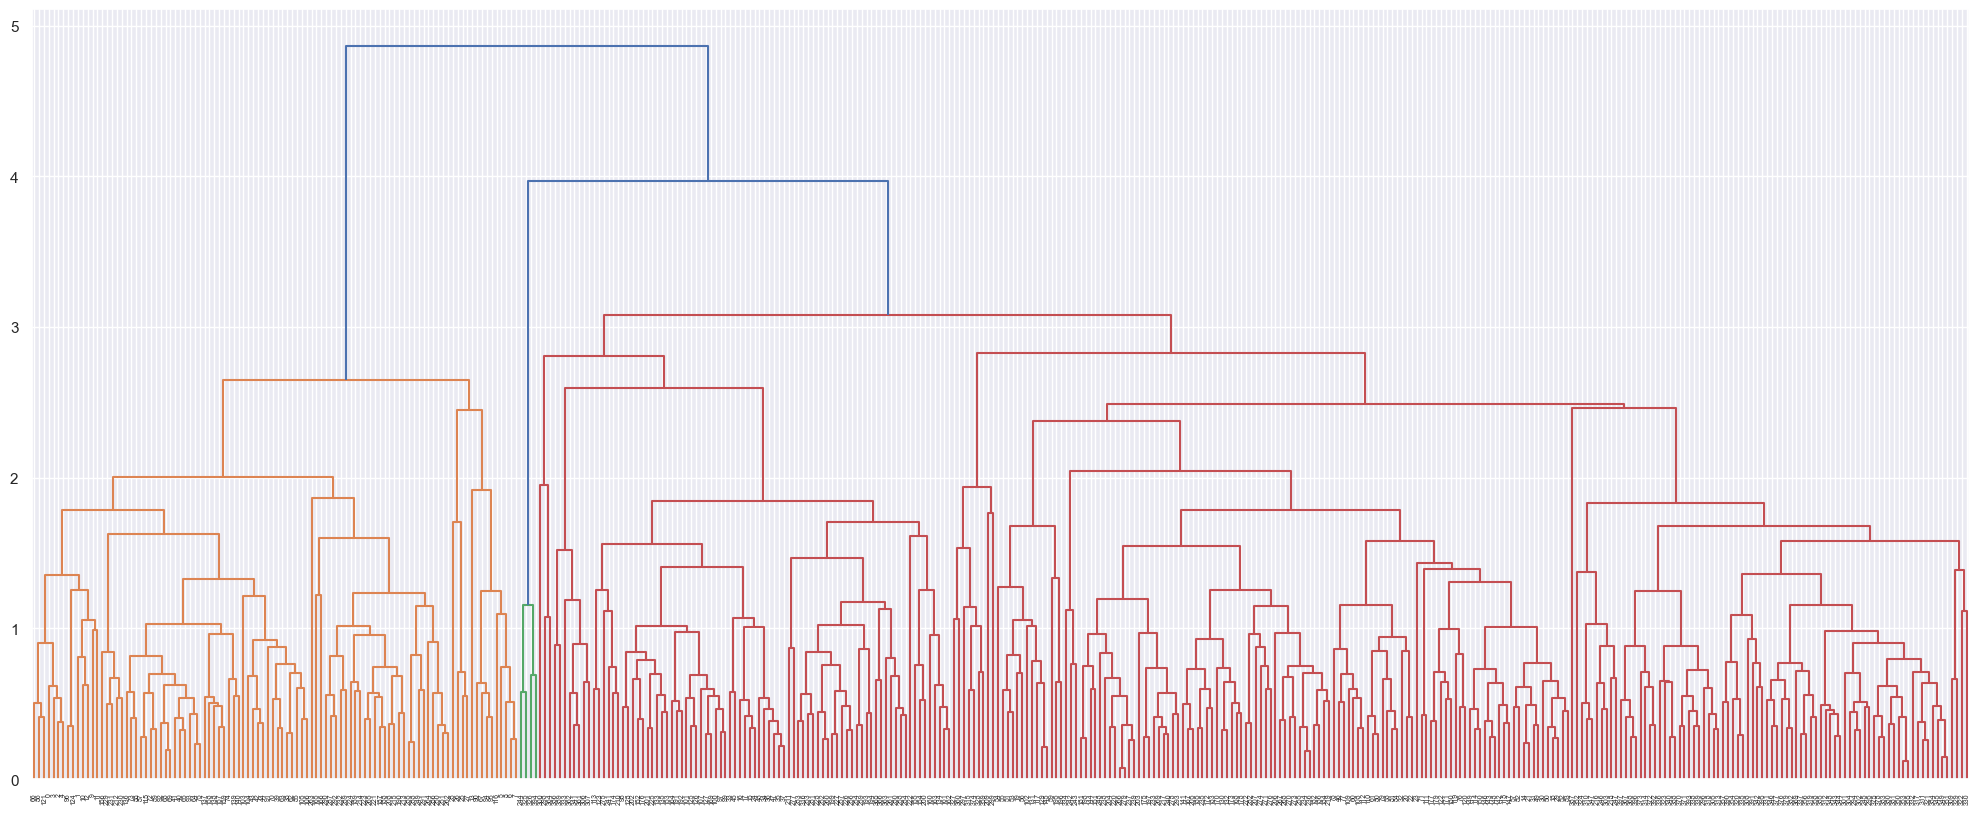

In [82]:
#plotting the H-cluster
plt.figure(figsize=(25, 10))
dendrogram(link_method)
plt.show()

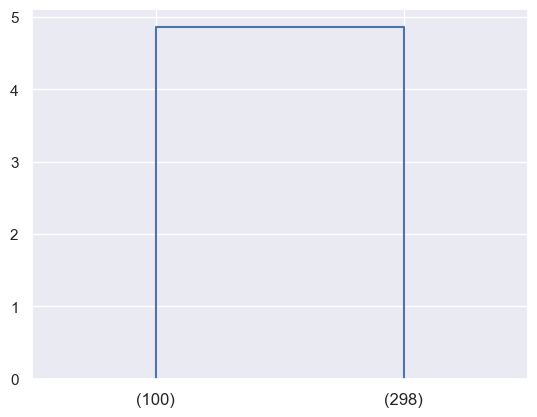

In [83]:
# dendrogram function to arrive at dendrogram
dendrogram(
    link_method,
    truncate_mode='lastp',  
    p=2,  
)
plt.show()

In [84]:
#vieweing the clusters formed
clusters = fcluster(link_method, 2, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,

In [85]:
#attaching the clusters formed to the scales data
cc_z['clusters_H'] = clusters
cc_z.head()

,cylinders,model year,mpg,displacement,horsepower,weight,acceleration,clusters_H
0,1.498191,-1.627426,-0.706439,1.090604,0.673118,0.630870,-1.295498,1
1,1.498191,-1.627426,-1.090751,1.503514,1.589958,0.854333,-1.477038,1
2,1.498191,-1.627426,-0.706439,1.196232,1.197027,0.550470,-1.658577,1
3,1.498191,-1.627426,-0.962647,1.061796,1.197027,0.546923,-1.295498,1
4,1.498191,-1.627426,-0.834543,1.042591,0.935072,0.565841,-1.840117,1


In [86]:
#vieweing the distribution of clusters
cc_z.clusters_H.value_counts().sort_index()

clusters_H
1    100
2    298
Name: count, dtype: int64

In [87]:
#attaching the clusters formed to the original data
cc['clusters_H']=clusters
carH['clusters_H']=clusters
cc.head()

,cylinders,model year,mpg,displacement,horsepower,weight,acceleration,clusters_H
0,8,70,18.0,307.0,130.0,3504,12.0,1
1,8,70,15.0,350.0,165.0,3693,11.5,1
2,8,70,18.0,318.0,150.0,3436,11.0,1
3,8,70,16.0,304.0,150.0,3433,12.0,1
4,8,70,17.0,302.0,140.0,3449,10.5,1


In [88]:
#create a new data set named Hclus
Hclus=cc
Hclus.head()

,cylinders,model year,mpg,displacement,horsepower,weight,acceleration,clusters_H
0,8,70,18.0,307.0,130.0,3504,12.0,1
1,8,70,15.0,350.0,165.0,3693,11.5,1
2,8,70,18.0,318.0,150.0,3436,11.0,1
3,8,70,16.0,304.0,150.0,3433,12.0,1
4,8,70,17.0,302.0,140.0,3449,10.5,1


In [89]:
#aggregating the numerical variable with the clusters formed with the mean
aggdata=cc.iloc[:,0:8].groupby('clusters_H').mean()
aggdata['Freq']=cc.clusters_H.value_counts().sort_index()
aggdata

,cylinders,model year,mpg,displacement,horsepower,weight,acceleration,Freq
clusters_H,,,,,,,,
1,7.980000,73.740000,14.684000,345.470000,160.400000,4121.560000,12.702000,100
2,4.607383,76.771812,26.477852,142.404362,85.479866,2584.137584,16.529866,298


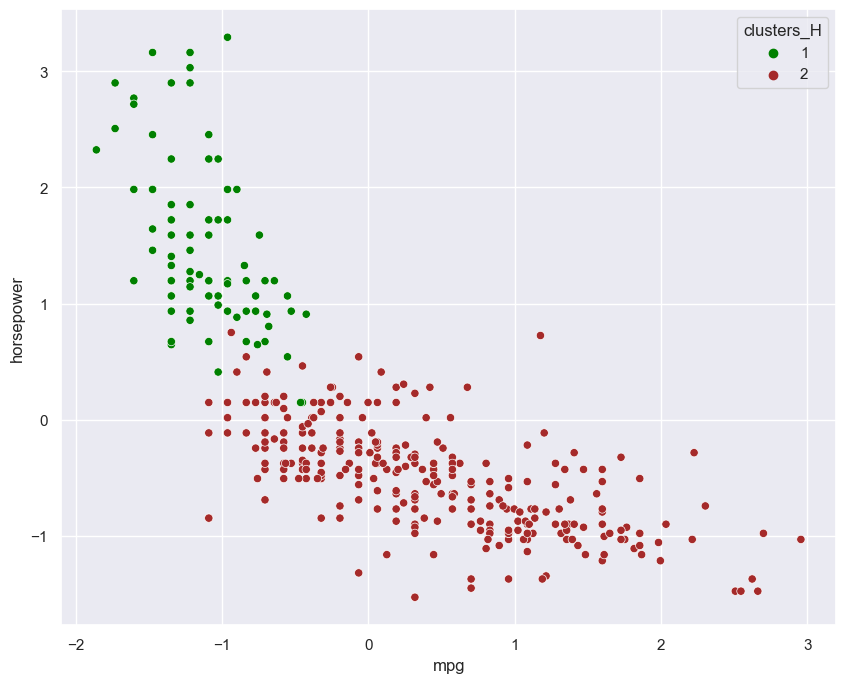

In [91]:
#plotting the clusters formed
plt.figure(figsize=(10, 8))
sns.scatterplot(x="mpg", y="horsepower", hue="clusters_H",
              data=cc_z, 
                    palette=['green','brown']);

**K-Means Clustering**


In [94]:
#seperating the numeric values
cc = car.iloc[:,0:7] 
cc = cc.apply(pd.to_numeric, errors='coerce')
cc_z1 = cc.apply(zscore)
cc_z1.head()

,cylinders,model year,mpg,displacement,horsepower,weight,acceleration
0,1.498191,-1.627426,-0.706439,1.090604,0.673118,0.630870,-1.295498
1,1.498191,-1.627426,-1.090751,1.503514,1.589958,0.854333,-1.477038
2,1.498191,-1.627426,-0.706439,1.196232,1.197027,0.550470,-1.658577
3,1.498191,-1.627426,-0.962647,1.061796,1.197027,0.546923,-1.295498
4,1.498191,-1.627426,-0.834543,1.042591,0.935072,0.565841,-1.840117


In [95]:
#calculatint the within sum of squares
wss =[] 
for i in range(1,5):
    KM = KMeans(n_clusters=i)
    KM.fit(cc_z1)
    wss.append(KM.inertia_)
wss

[2785.999999999999, 1294.8418950727319, 946.0197908553791, 738.4159737149628]

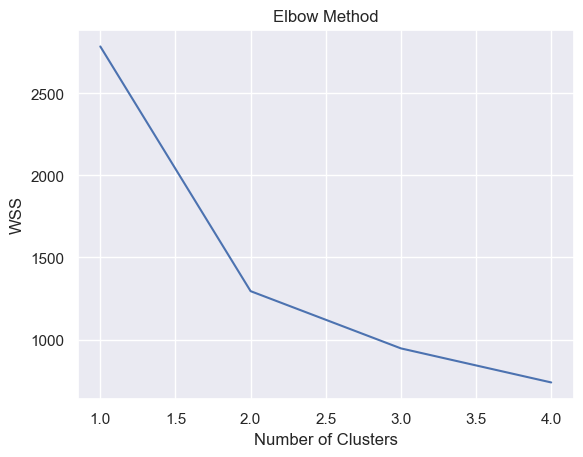

In [96]:
#plotting the WSS against the number of cluster to come up with optimal number of clusters using Elbow-method
plt.plot(range(1,5), wss);
plt.title('Elbow Method');
plt.xlabel("Number of Clusters")
plt.ylabel("WSS");

In [97]:
#using 2 centroids for clustering
k_means = KMeans(n_clusters = 2)
k_means.fit(cc_z1)
labels = k_means.labels_

In [98]:
# Calculating silhouette_score
silhouette_score(cc_z1,labels)

0.48235946103916116

In [99]:
#calculating silhouette score for different centroids
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}


silhouette_coefficients = []

 # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cc_z1)
    score = silhouette_score(cc_z1,kmeans.labels_)
    silhouette_coefficients.append(score)
    

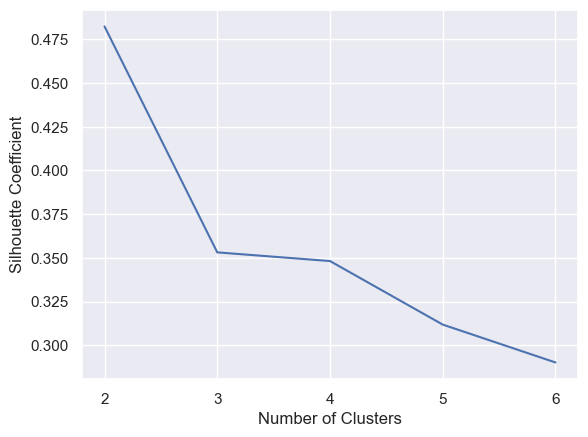

In [100]:
#plotting silhouette score for different centroids
plt.plot(range(2, 7), silhouette_coefficients)
plt.xticks(range(2, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [101]:
#attaching the labels to the datasets
cc["cluster_K"] = labels
carK['cluster_K']=labels
Kclus=cc
Kclus.head()

,cylinders,model year,mpg,displacement,horsepower,weight,acceleration,cluster_K
0,8,70,18.0,307.0,130.0,3504,12.0,0
1,8,70,15.0,350.0,165.0,3693,11.5,0
2,8,70,18.0,318.0,150.0,3436,11.0,0
3,8,70,16.0,304.0,150.0,3433,12.0,0
4,8,70,17.0,302.0,140.0,3449,10.5,0


In [102]:
#vieweing the distribution of clusters
cc.cluster_K.value_counts().sort_index()

cluster_K
0    105
1    293
Name: count, dtype: int64

In [103]:
#attaching the clsuters to the scaled data
cc_z1["cluster_K"] = labels
cc_z1.head()

,cylinders,model year,mpg,displacement,horsepower,weight,acceleration,cluster_K
0,1.498191,-1.627426,-0.706439,1.090604,0.673118,0.630870,-1.295498,0
1,1.498191,-1.627426,-1.090751,1.503514,1.589958,0.854333,-1.477038,0
2,1.498191,-1.627426,-0.706439,1.196232,1.197027,0.550470,-1.658577,0
3,1.498191,-1.627426,-0.962647,1.061796,1.197027,0.546923,-1.295498,0
4,1.498191,-1.627426,-0.834543,1.042591,0.935072,0.565841,-1.840117,0


In [104]:
#aggregating the numerical variable with the clusters formed with the mean
aggdata=cc.iloc[:,0:8].groupby('cluster_K').mean()
aggdata['Freq']=cc.cluster_K.value_counts().sort_index()
aggdata

,cylinders,model year,mpg,displacement,horsepower,weight,acceleration,Freq
cluster_K,,,,,,,,
0,7.923810,73.742857,14.851429,341.809524,158.000000,4093.771429,12.867619,105
1,4.569966,76.822526,26.619113,140.250853,85.061433,2567.860068,16.535836,293


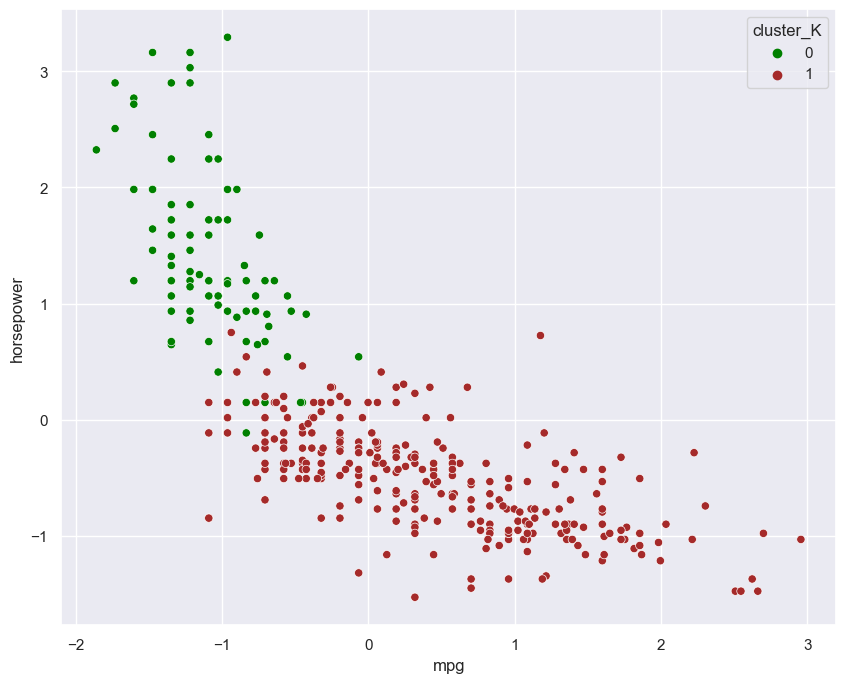

In [106]:

#plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x="mpg", y="horsepower", hue="cluster_K",
              data=cc_z1, 
                    palette=['green','brown']);

In [107]:
carH.clusters_H.value_counts().sort_index()

clusters_H
1    100
2    298
Name: count, dtype: int64

In [108]:
carK.cluster_K.value_counts().sort_index()

cluster_K
0    105
1    293
Name: count, dtype: int64

In [109]:
carH.shape

(398, 14)

In [110]:
carK.shape

(398, 14)

In [111]:
car.head()

,cylinders,model year,mpg,displacement,horsepower,weight,acceleration,origin_america,origin_asia,origin_europe,mpg_level_high,mpg_level_low,mpg_level_medium
0,8,70,18.0,307.0,130,3504,12.0,True,False,False,False,False,True
1,8,70,15.0,350.0,165,3693,11.5,True,False,False,False,True,False
2,8,70,18.0,318.0,150,3436,11.0,True,False,False,False,False,True
3,8,70,16.0,304.0,150,3433,12.0,True,False,False,False,True,False
4,8,70,17.0,302.0,140,3449,10.5,True,False,False,False,False,True
